In [1]:
# Step 1: Import the dataset and basic exploration
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")

# Display first few rows
print(df.head())

# Basic info
print(df.info())

# Check null values
print(df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [5]:
# Instead of using inplace=True (which causes warnings), do this:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [6]:
# Step 3: Convert categorical features into numerical
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
df['Sex'] = label_enc.fit_transform(df['Sex'])          # male=1, female=0
df['Embarked'] = label_enc.fit_transform(df['Embarked'])  # C=0, Q=1, S=2


In [9]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Sample data
X_train = np.array([[1, 2], [3, 4], [5, 6]])
X_test = np.array([[7, 8], [9, 10]])

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled:\n", X_train_scaled)
print("\nX_test_scaled:\n", X_test_scaled)

X_train_scaled:
 [[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]

X_test_scaled:
 [[2.44948974 2.44948974]
 [3.67423461 3.67423461]]


In [8]:
print(df.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare    Cabin  Embarked  
0         A/5 21171   7.2500  Unknown         2  
1          PC 17599  71.2833      C85         0  
2  STON/O2. 3101282   7.9250  Unknown         2  
3            113803  53.1000     C123         2  
4            373450   8.0500  Unknown         

In [10]:
# Step 4: Normalize/standardize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

df[num_cols] = scaler.fit_transform(df[num_cols])


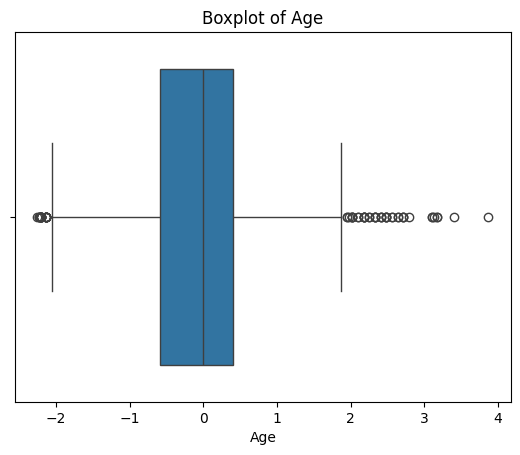

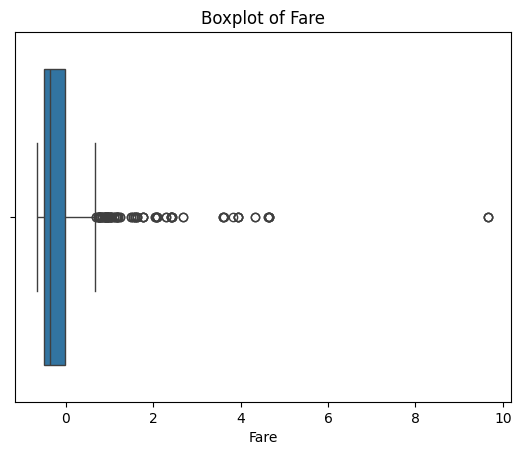

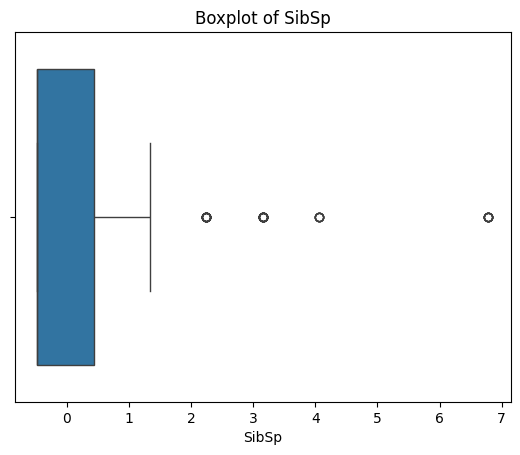

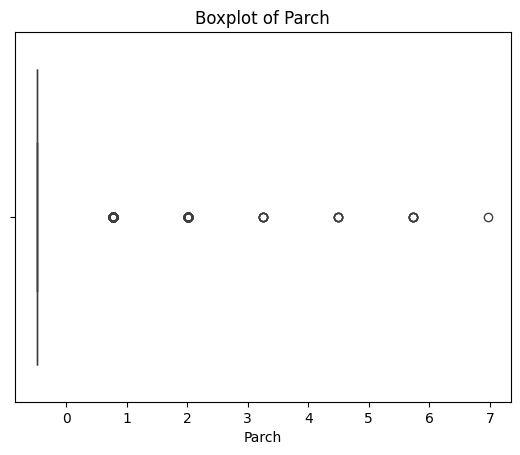

(577, 12)


In [11]:
# Step 5: Visualize outliers using boxplots and remove them
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Remove outliers using IQR method
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

for col in num_cols:
    df = remove_outliers(df, col)

print(df.shape)  # Final shape after outlier removal


# 🧠 Data Preprocessing: Q&A Cheatsheet

---

### 1️⃣ What are the different types of missing data?

- **MCAR (Missing Completely at Random)**: No pattern or reason behind missingness.
- **MAR (Missing at Random)**: Missingness depends on observed data.
- **MNAR (Missing Not at Random)**: Missingness depends on unobserved data (not random).

---

### 2️⃣ How do you handle categorical variables?

- **Label Encoding**: Assigns a unique integer to each category.  
  👉 Use for tree-based models (e.g., `male=0`, `female=1`).
  
- **One-Hot Encoding**: Creates binary columns for each category.  
  👉 Best for linear models to avoid ordinal relationships.

- **Ordinal Encoding**: Use when categories have order (e.g., `Low=0`, `Medium=1`, `High=2`).

---

### 3️⃣ What is the difference between normalization and standardization?

| Technique       | Formula                                       | Result                   |
|----------------|-----------------------------------------------|--------------------------|
| Normalization   | \[ x' = \frac{x - x_{min}}{x_{max} - x_{min}} \] | Scales to [0, 1]         |
| Standardization | \[ x' = \frac{x - \mu}{\sigma} \]             | Mean = 0, SD = 1         |

---

### 4️⃣ How do you detect outliers?

- **Boxplot / IQR Method**:  
  Outliers lie outside  
  \[ Q1 - 1.5 × IQR \text{ or } Q3 + 1.5 × IQR \]

- **Z-score**:  
  If \[ |Z| > 3 \], it's an outlier.

- **Isolation Forest / Local Outlier Factor (LOF)**:  
  ML-based outlier detection.

---

### 5️⃣ Why is preprocessing important in ML?

- Removes noise and inconsistency
- Converts data into a suitable format for ML algorithms
- Improves **accuracy, speed**, and **interpretability**
- Reduces chances of **bias, overfitting, or underfitting**

---

### 6️⃣ What is one-hot encoding vs label encoding?

| Method           | Description                                | Example (`Color`)       |
|------------------|--------------------------------------------|--------------------------|
| Label Encoding   | Each category → unique number               | Red=0, Green=1, Blue=2   |
| One-Hot Encoding | Creates binary column for each category     | Red=[1,0,0], Blue=[0,0,1]|

- ❗ One-hot avoids implying order; label encoding can be misleading for linear models.

---

### 7️⃣ How do you handle data imbalance?

- **Oversampling**: Duplicate or synthetically create samples from minority class (e.g., SMOTE).
- **Undersampling**: Remove samples from the majority class.
- **Class Weights**: Modify algorithm to penalize misclassification of minority class.
- **Synthetic Methods**: Use ADASYN, SMOTE, etc.

---

### 8️⃣ Can preprocessing affect model accuracy?

✅ **Absolutely yes!**

- Good preprocessing:
  - Improves **accuracy, generalization, and training speed**
  - Avoids **data leakage**
- Bad preprocessing:
  - Leads to **poor results, model bias, or overfitting**

---

